<a href="https://colab.research.google.com/github/SchmetterlingIII/D.T./blob/main/task12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 12
Create a dynamic model of the path of a beam of white light through a triangular prism.

## Intentions
1. Create a table of all the results that I want:
    | Incident Angle (alpha) | Refracted Angle (beta) | Incident (inside of glass) (delta) | Emergent Angle (rho)
    Very simple rules have been used for this
2. From these results, see how I could plot a triangle within python for this to be a dynamic working thing, likely using a lot of linear functions to display this dynamically (FuncAnimation for example)
3. Iterate and improve this to make look good (and try to fill in the region between the linear functions of the triangle with some colour to differentiate it all)

Refractive index: 1.5183908287640628


/tmp/ipython-input-61-294466674.py:29: RuntimeWarning: invalid value encountered in arcsin
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))
/tmp/ipython-input-61-294466674.py:64: RuntimeWarning: invalid value encountered in arcsin
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))


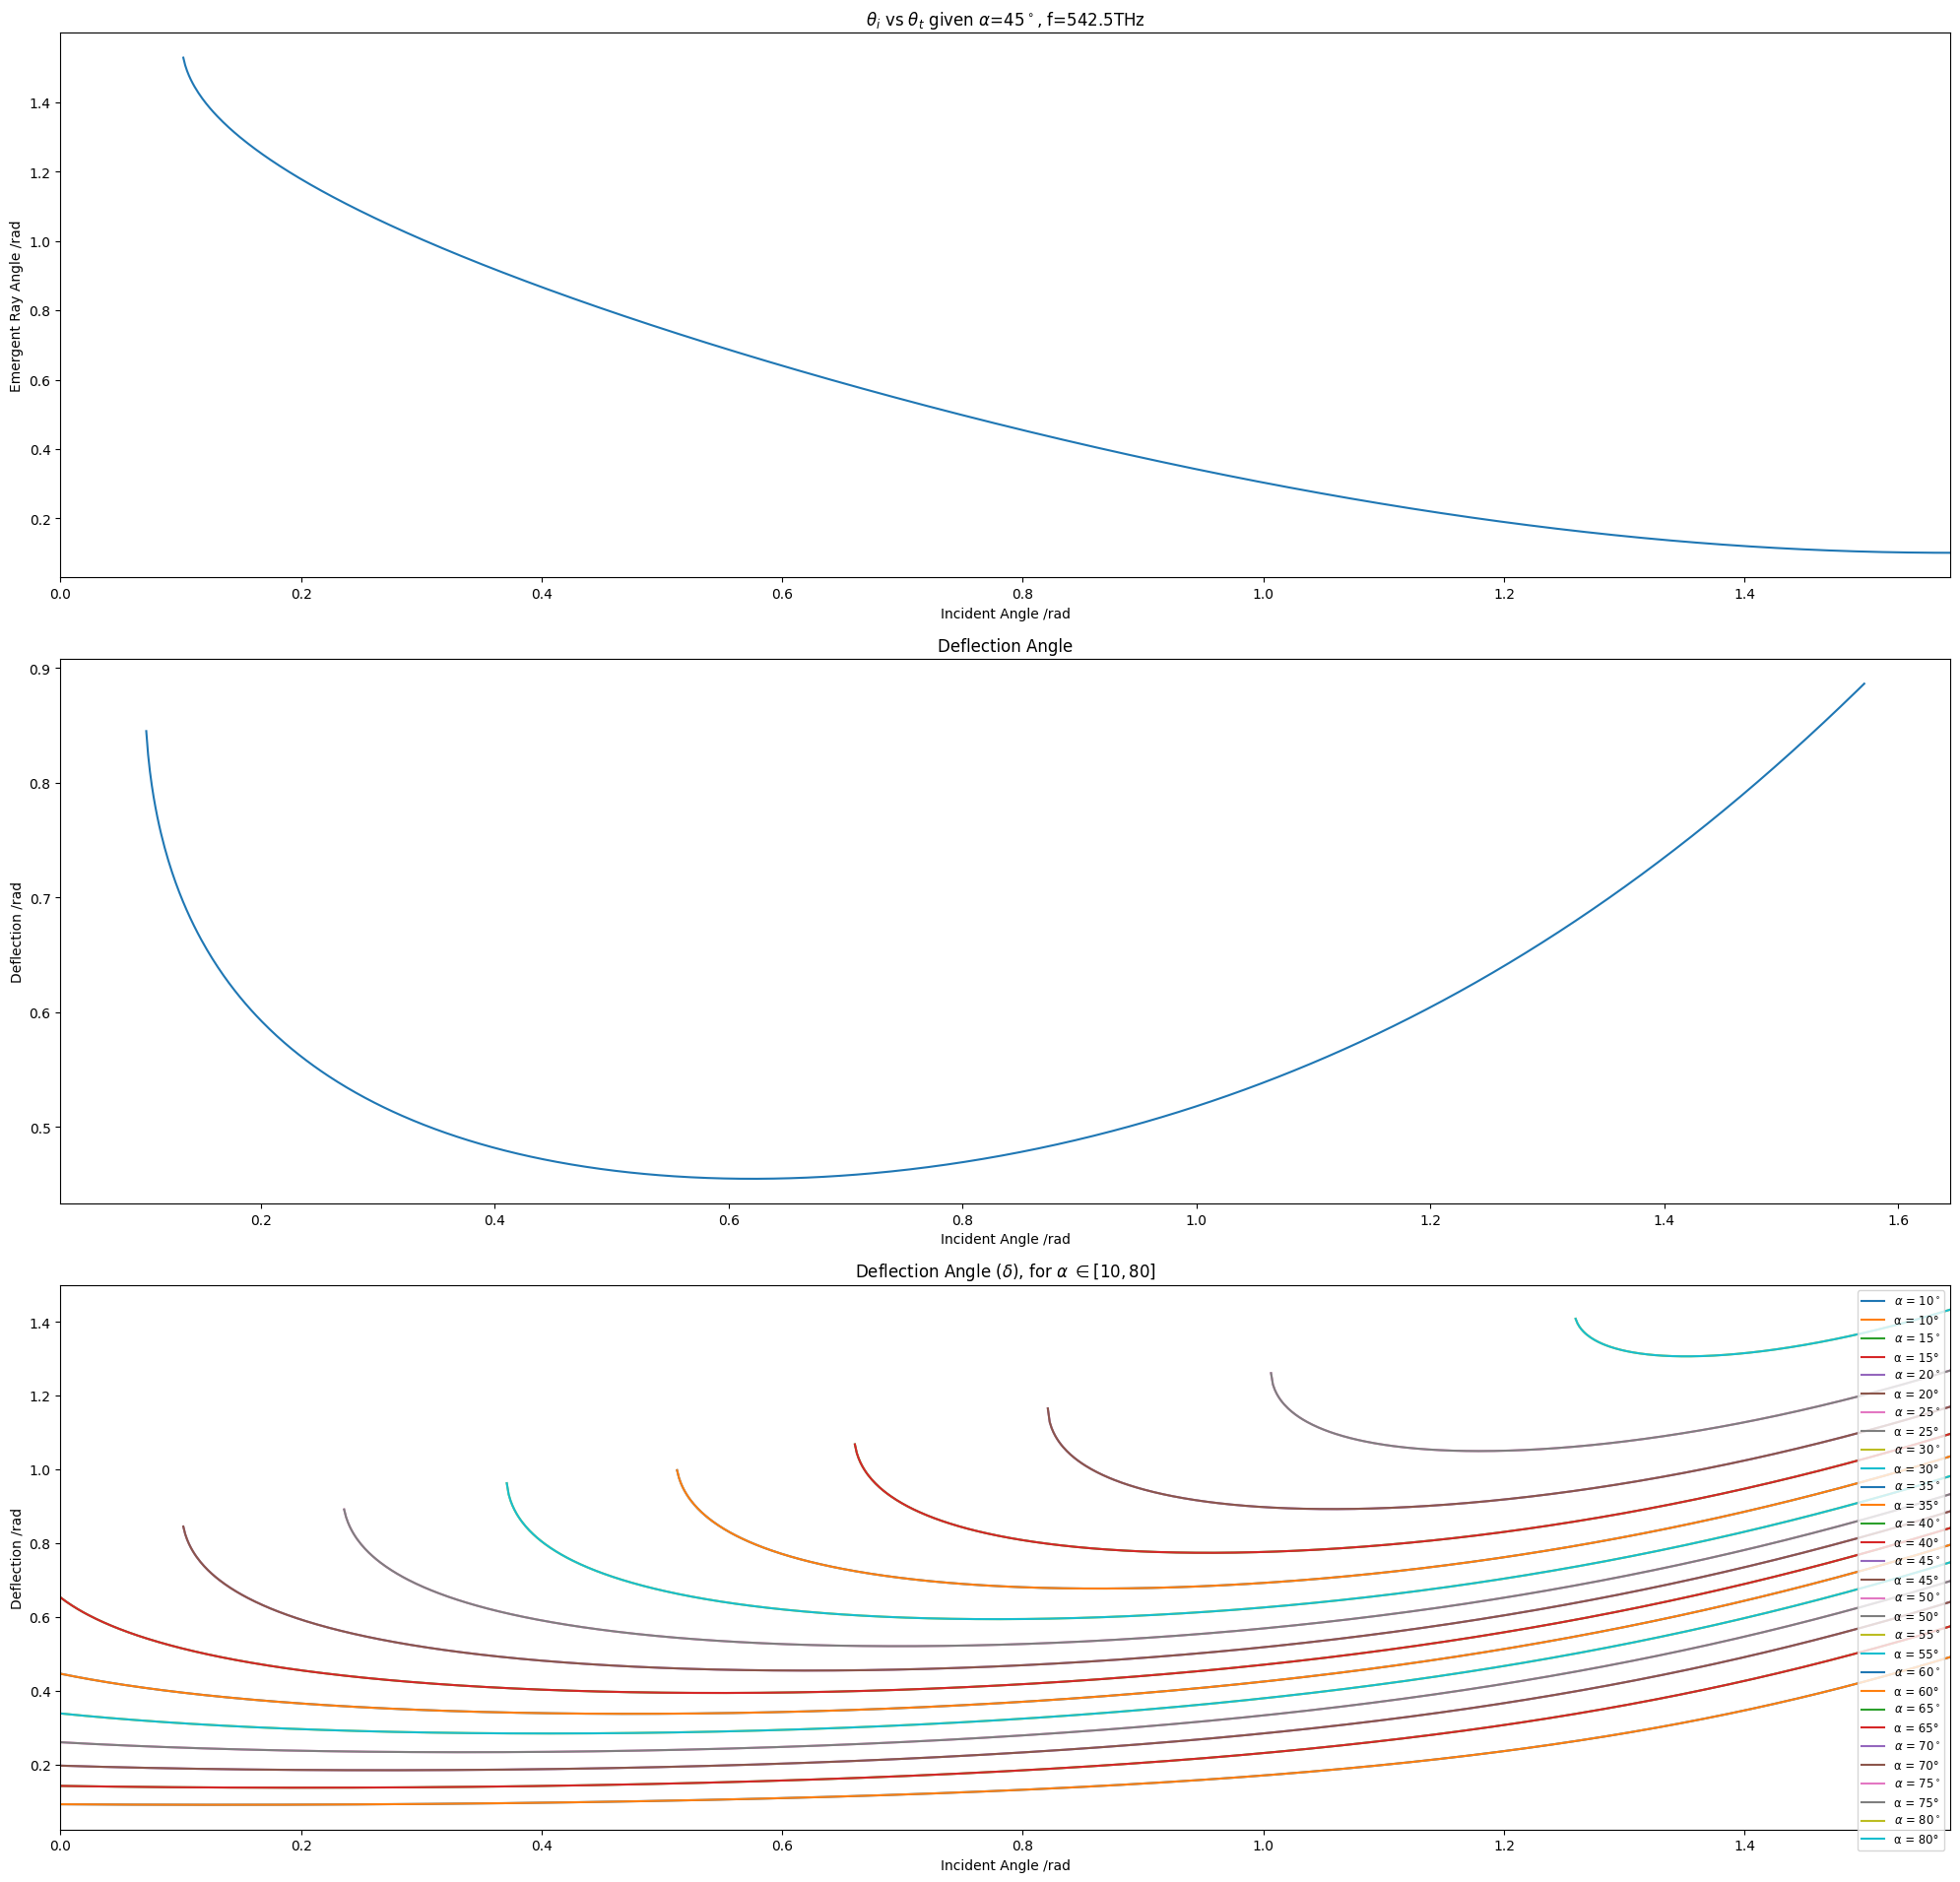

In [61]:
## modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## constants
n_air = 1
frequency = 542.5 * (10 ** 12)
wavelength = (299792458 / frequency) * 1e6 # converted to nanometres (to work for sellmeier equation)
alpha = 45 # (degrees)
alpha_list = np.arange(10, 85, 5)

## refractive index of crown glass
a = [1.03961212, 0.231792344, 1.01146945]
b = [0.00600069867, 0.0200179144, 103.560653]
summation = []
for i in range(len(a)):
  s = (a[i] * (wavelength ** 2))/((wavelength ** 2) - b[i])
  summation.append(s)
n_glass = np.sqrt(1 + sum(summation))
print(f"Refractive index: {n_glass}")

## equations

### angles
theta_1 = np.radians(np.linspace(0, 90, 1000)) # incident angle
theta_2 = np.arcsin((n_air/n_glass)*np.sin(theta_1)) # refracted angle
theta_3 = np.radians(alpha) - theta_2 # internal incident angle
theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))

### deflection
delta = theta_1 + theta_4 - np.radians(alpha)


## table of results
df = pd.DataFrame({
    'Incident Angle': theta_1,
    'Refracted Angle': theta_2,
    'Internal Incident Angle': theta_3,
    'Emergent Ray Angle': theta_4
})

## plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20))
ax1.plot(theta_1, theta_4)
ax1.set_xlabel('Incident Angle /rad')
ax1.set_ylabel('Emergent Ray Angle /rad')
ax1.set_title(r'$\theta_i$ vs $\theta_t$ given $\alpha$=45$^\circ$, f=542.5THz')
ax1.set_xlim(np.radians(0), np.radians(90))

ax2.plot(theta_1, delta)
ax2.set_xlabel('Incident Angle /rad')
ax2.set_ylabel('Deflection /rad')
ax2.set_title("Deflection Angle")


# some super inefficient stuff
for i in range(len(alpha_list)):
  alpha = alpha_list[i]
  ### angles
  theta_1 = np.radians(np.linspace(0, 90, 1000)) # incident angle
  theta_2 = np.arcsin((n_air/n_glass)*np.sin(theta_1)) # refracted angle
  theta_3 = np.radians(alpha) - theta_2 # internal incident angle
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))

  ### deflection
  delta = theta_1 + theta_4 - np.radians(alpha)

  ax3.plot(theta_1, delta, label = rf"$\alpha$ = {alpha}$^\circ$")
  ax3.plot(theta_1, delta, label=f'α = {alpha}°')

ax3.set_xlabel('Incident Angle /rad')
ax3.set_ylabel('Deflection /rad')
ax3.set_title(r"Deflection Angle ($\delta$), for $\alpha$ $\in [10,80]$")
ax3.set_xlim(np.radians(0), np.radians(90))
ax3.legend(loc='upper right', fontsize = 'small', fancybox = True)

plt.tight_layout()
plt.show()

## print
